### Name - Bolonghe B.P.M
### Index No - 190095C
### GitHub repository - https://github.com/Pasindu-Manodara/Image-Processing-Home-Work-Exercise.git

#### Question 1

Text(0.5, 0, 'Z')

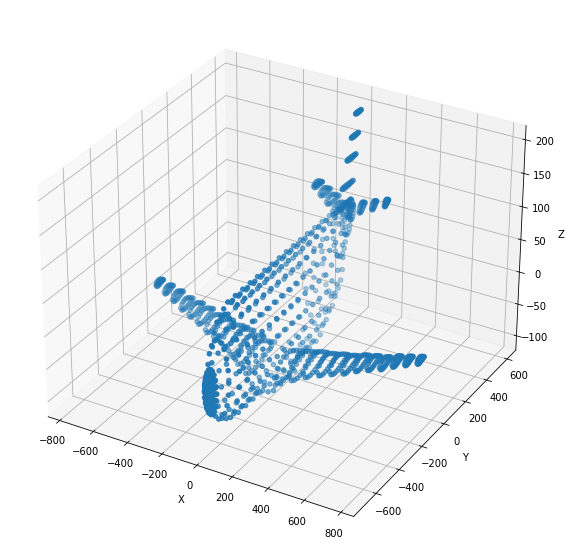

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from plyfile import PlyData,PlyElement 


pcd = PlyData.read(r'images/airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1,-1),pcd['vertex']['y'].reshape(1,-1),pcd['vertex']['z'].reshape(1,-1)),axis=0)
points = points - np.mean(points, axis = 1).reshape(3, 1)


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(points[0, :], points[1, :], points[2, :])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

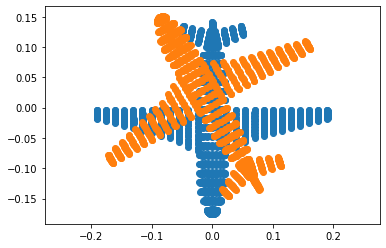

In [3]:
ones =np.ones((1,points.shape[1]))
X = np.concatenate((points,ones),axis = 0)

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t =-np.array([[0],[0],[-4000]])

P1 = K @ np.concatenate((R,t),axis=1)
angle= np.pi/6
R = np.array([[np.cos(angle), -np.sin(angle), 0], [np.sin(angle), np.cos(angle), 0], [0, 0, 1]])
K = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
t = np.array([[0], [0], [-4000]])
P2 = K @ np.concatenate((R,t),axis=1)


x1 = P1 @ X
x2 = P2 @ X
x1 = x1/x1[2,:]
x2 = x2/x2[2, :]

fig,ax = plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(x1[0,:],x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis('equal')
plt.show()



#### Question 3

Item 1 , area in pixels- 59143
Item 1 , area in pixels- 2318.642172
Item 2 , area in pixels- 59211
Item 2 , area in pixels- 2321.3080440000003


Text(0.5, 1.0, 'Segmented')

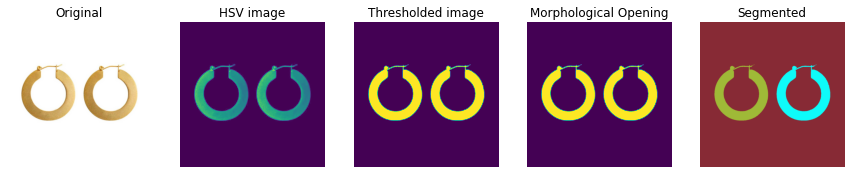

In [4]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im = cv.imread(r'images/earrings.jpg',cv.IMREAD_COLOR)
assert im is not None
hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
th,bw = cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

w =5
kernel = np.ones((w,w),np.uint8)
opened = cv.morphologyEx(bw,cv.MORPH_CLOSE,kernel)

retval , labels, stats,centeroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)

z = 720
f = 8
for i,s in enumerate(stats):
    if i !=0:
        print('Item',i,', area in pixels-',s[4])
        print('Item',i,', area in pixels-',s[4]*(2.2e-3)**2*(z*z)/(f*f))


fig, ax = plt.subplots(1, 5, figsize = (15, 15))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(hsv[:, :, 1])
ax[1].axis('off')
ax[1].set_title('HSV image')
ax[2].imshow(bw)
ax[2].axis('off')
ax[2].set_title('Thresholded image')
ax[3].imshow(opened)
ax[3].axis('off')
ax[3].set_title('Morphological Opening')
ax[4].imshow(colormapped)
ax[4].axis('off')
ax[4].set_title('Segmented')

#### Question 4

(0, 0, 0, 0)


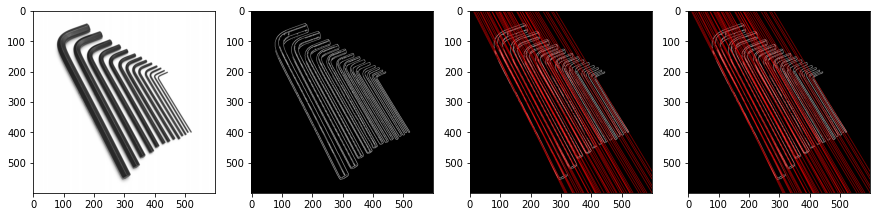

In [13]:
im = cv.imread( r'images/allenkeys.jpg', cv .IMREAD_REDUCED_GRAYSCALE_2)
canny = cv.Canny(im , 50 , 150)

canny_color = cv.cvtColor( canny, cv.COLOR_GRAY2BGR)
lines = cv.HoughLines( canny , 1 , np . pi / 180 , 170 , None , 0 , 0)


if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        pt1 = ((int(x0 + 1000*(-b)) , int(y0 + 1000*(a))))
        pt2 = ((int(x0 - 1000*(-b)) , int(y0 - 1000*(a))))
        cv.line(canny_color, pt1, pt2, (0, 0, 255), 1, cv.LINE_AA)



x0, y0 = int(r[0] + r[2]/2), int(r[1] + r[3]/2)
m = b/a
m = np.tan(np.median(lines[:, 0, 1]))
c = y0 - m*x0

cv.line(canny_color, (0, int(c)), (im.shape[0], int(m*im.shape[0] + c)), (0, 255, 0), 2, cv.LINE_AA)


dy = 1
y_sub_pixel = np.arange(0, im.shape[0]-1, dy)
f_sub_pixel = np.zeros_like(y_sub_pixel)
f_sub_pixel_nn = np.zeros_like(y_sub_pixel)

for i, y in enumerate(y_sub_pixel):
    pass


cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
fig, ax = plt.subplots(1, 4, figsize = (15, 15))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(canny, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(canny_color, cv.COLOR_BGR2RGB))
ax[3].imshow(cv.cvtColor(canny_color, cv.COLOR_BGR2RGB))
r = cv.selectROI("Image", canny_color, showCrosshair= True, fromCenter = False)
cv.waitKey(0)
cv.destroyAllWindows()
print(r)